In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [3]:
# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('adult.csv')

In [4]:
data.shape

(32561, 15)

In [5]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
for i in data.columns:
    print(i,":",data[i].nunique(),"\n",data[i].unique())

age : 73 
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass : 9 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt : 21648 
 [ 77516  83311 215646 ...  34066  84661 257302]
education : 16 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num : 16 
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status : 7 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation : 15 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' '

In [9]:
data["salary"].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [10]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
data[data.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [13]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

<Axes: xlabel='education'>

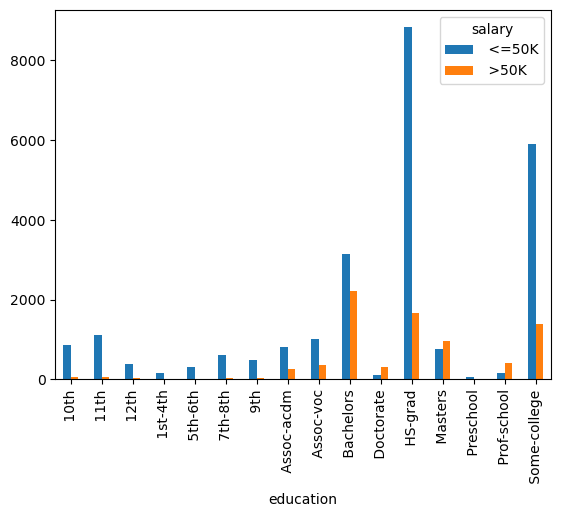

In [14]:
inc_edu = pd.crosstab(data['education'],data['salary'])
inc_edu.plot(kind='bar')

<Axes: xlabel='sex'>

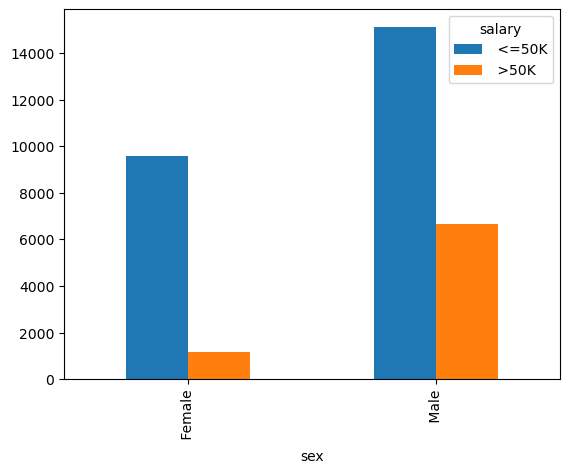

In [15]:
inc_sex = pd.crosstab(data['sex'],data['salary'])
inc_sex.plot(kind='bar')

<Axes: xlabel='workclass'>

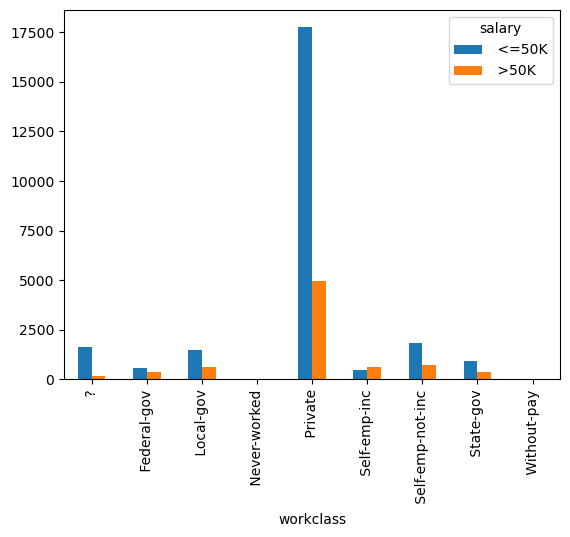

In [16]:
inc_work = pd.crosstab(data['workclass'],data['salary'])
inc_work.plot(kind='bar')

C:\Users\ankup\AppData\Local\Temp\ipykernel_6596\1895024945.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="CMRmap", annot=True)


<Axes: >

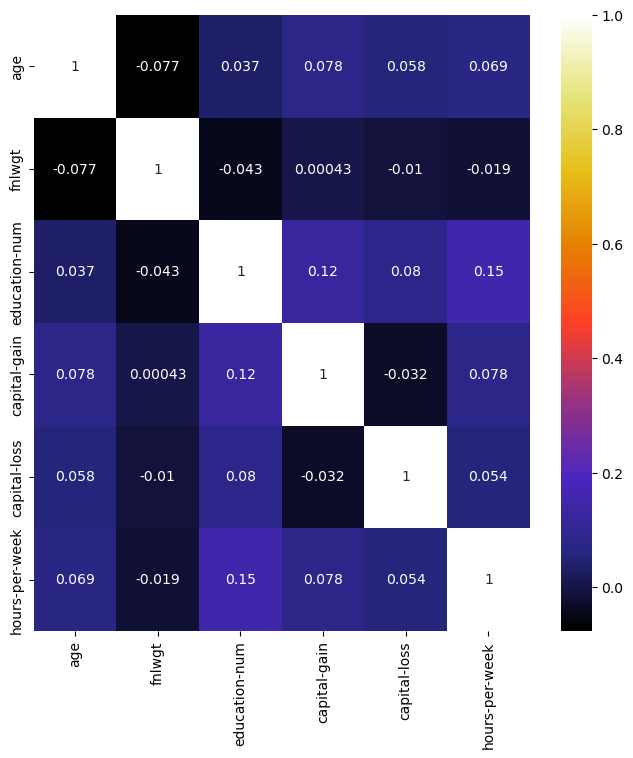

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), cmap="CMRmap", annot=True)

In [30]:
# Calculate class weights
class_weights = {
    0: len(data) / (2 * len(data[data['salary'] == 0])),
    1: len(data) / (2 * len(data[data['salary'] == 1]))
}


In [31]:
# Selecting features and target variable
X = data[['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'race', 'sex','hours-per-week','country']]
y = data['salary']

In [32]:

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
X_train

,age,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,country
32239,36,3,11,9,5,0,4,0,38,38
30377,52,3,11,9,0,2,4,1,40,38
5457,34,3,15,10,2,0,4,1,40,38
19700,54,3,11,9,0,13,2,1,40,38
23197,30,3,11,9,2,9,4,1,55,38
...,...,...,...,...,...,...,...,...,...,...
29823,38,3,14,15,2,11,4,0,40,38
5392,63,3,9,13,6,0,4,0,25,38
860,18,3,1,7,4,0,4,0,20,38
15801,34,3,8,11,2,2,4,1,50,38


In [34]:
# Feature Scaling (optional but can help with some algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [35]:
Random_Forest = RandomForestClassifier(n_estimators=100, class_weight=class_weights, random_state=42)
cv_scores = cross_val_score(Random_Forest, X_train, y_train, cv=5)
print(f'Mean Accuracy: {cv_scores.mean()}')


Mean Accuracy: 0.8109416940403132


In [36]:
logistic_regression = LogisticRegression()
cv_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5)
print(f'Mean Accuracy: {cv_scores.mean()}')


Mean Accuracy: 0.8032578090085222


In [37]:
Decision_tree = DecisionTreeClassifier(random_state=0)
cv_scores = cross_val_score(Decision_tree, X_train, y_train, cv=5)
print(f'Mean Accuracy: {cv_scores.mean()}')

Mean Accuracy: 0.7758651714584849


In [38]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [39]:
grid_search = GridSearchCV(estimator=Random_Forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [40]:
# Fit the grid search to your data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.658697060490728,
                                                            1: 2.075328485776247},
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [41]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [48]:
Best_Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

In [49]:
best_rf_model = RandomForestClassifier(max_depth=30,min_samples_leaf =1, min_samples_split= 5, n_estimators= 300, class_weight=class_weights)
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.658697060490728,
                                     1: 2.075328485776247},
                       max_depth=30, min_samples_split=5, n_estimators=300)

In [50]:
# Evaluateing the best model on the test set
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Set Accuracy with Best Model: {accuracy}')

Test Set Accuracy with Best Model: 0.8217578365089121


In [51]:
import pickle

In [52]:
pickle.dump(best_rf_model,open("best_rf_model.pkl",'wb'))